# Portfolio Analyis

### Alexei Marcilio
#### April 18, 2019

The purpose of this program is to evaluate the performance of any portfolio 
of stocks. Yahoo finance API is used to import financial data from stocks
and years of interest.

In [2]:
# Import libraries
from pandas_datareader import data as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
%matplotlib inlin

 Here the stocks and years of interest can be edited.

In [3]:
# Start here - check these tickers
tickers = ['XIU.TO','XBB.TO','VTI','XSB.TO']
# Years of interest
years = ['2012','2013','2014','2015','2016','2017','2018','2019']

In [4]:
# Pull in yahoo finance data
new_data = pd.DataFrame()
for t in tickers:
    new_data[t] = wb.DataReader(t, data_source='yahoo', start='2010-1-1')['Adj Close']

In [5]:
new_data.index = new_data.index.map(str)

# Add a date column
new_data['trade_year'] = new_data.index.str.slice(0, 4)

# Prevent warning when writing back to object
pd.options.mode.chained_assignment = None  # default='warn'

In [6]:
new_data.describe()

,XIU.TO,XBB.TO,VTI,XSB.TO
count,2335.000000,2334.000000,2294.000000,2334.000000
mean,18.081019,27.069506,90.069964,25.403110
std,3.304617,2.583300,29.980148,1.332154
min,12.758200,21.719139,43.869820,22.419291
25%,14.966347,25.346185,60.944577,24.370813
50%,18.112352,27.192884,91.983444,25.597860
75%,21.206652,29.463751,111.489723,26.608252
max,25.160000,31.590000,149.803406,27.629999


In [7]:

# A list used to keep the stock return data
values = []

# Loop through each year and the each ticker and find the last day and the first day
# of the year to calculate the return
for y in years:
    for t in tickers:
        a = new_data[new_data.index == new_data[new_data.trade_year == y].index.max()][t]
        b = new_data[new_data.index == new_data[new_data.trade_year == y].index.min()][t]
        # calculate the rate of return
        rate_return = a[[0][0]]/b[[0][0]] - 1
        # add to the values list
        values.append([t, y, rate_return])
    

# Create the DataFrame from the list
values_df = pd.DataFrame(values)  
# Rename the DataFrame columns
values_df.columns = ['ticker','trade_year','yr_return']
# Sort the DataFrame
values_df.sort_values(by=['ticker','trade_year'], inplace=True)
# Format the value of the yr_return column
values_df['yr_return'] = round(values_df.yr_return,4) * 100

# Make the index just the date instead of the datetime
new_data.index = new_data.index.str.slice(0,10)

*Here's another way to do this - perhaps simpler*

In [8]:
# A list used to keep the stock return data
values = []

# Loop through each year and the each ticker and find the last day and the first day
# of the year to calculate the return
for y in years:
    for t in tickers:
        # We can use iloc to find the last value and the first value
        rate_return = new_data[new_data['trade_year'] == y].iloc[-1][t] / \
        new_data[new_data['trade_year'] == y].iloc[0][t] - 1
        values.append([t, y, rate_return])
    

# Create the DataFrame from the list
values_df = pd.DataFrame(values)  
# Rename the DataFrame columns
values_df.columns = ['ticker','trade_year','yr_return']
# Sort the DataFrame
values_df.sort_values(by=['ticker','trade_year'], inplace=True)
# Format the value of the yr_return column
values_df['yr_return'] = round(values_df.yr_return,4) * 100

# Make the index just the date instead of the datetime
new_data.index = new_data.index.str.slice(0,10)


### Returns for Each Year

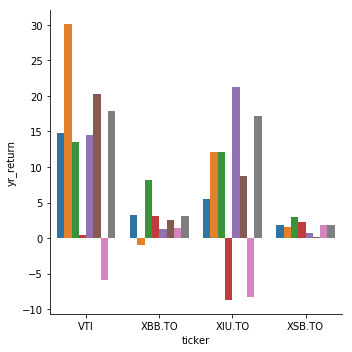

In [9]:
values_df

sns.catplot(x='ticker', y='yr_return', hue='trade_year', data=values_df, kind='bar', legend=False)

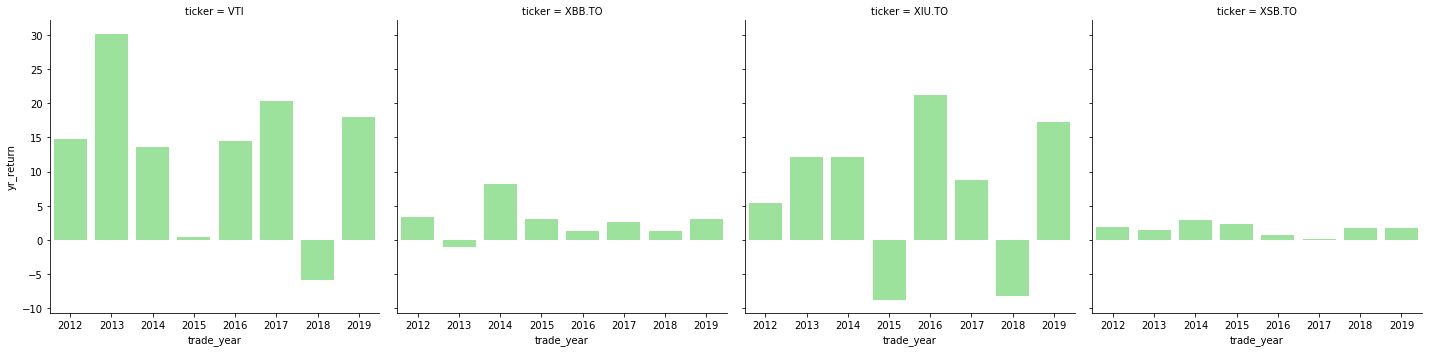

In [10]:
sns.catplot("trade_year", "yr_return", col="ticker", data=values_df, \
            kind="bar", color='lightgreen')

### Adjusted Closing Price

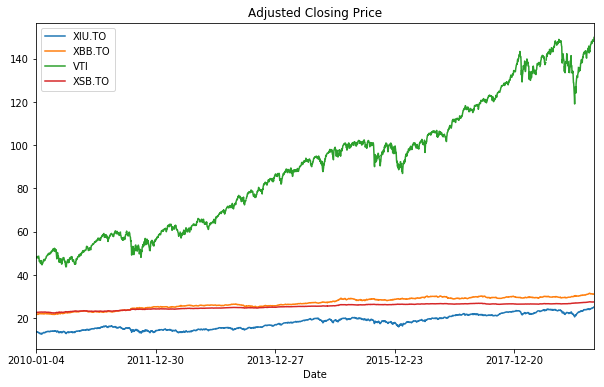

In [11]:
for t in tickers:
    new_data[t].plot(legend=True, figsize=(10, 6), \
    title='Adjusted Closing Price', \
    label=t)

### Normalize to 100

$$
\frac{P_t}{P_0} * 100
$$



*But its better to normalize to 100 and then look at the plots.*
This allows us to start at a common point.

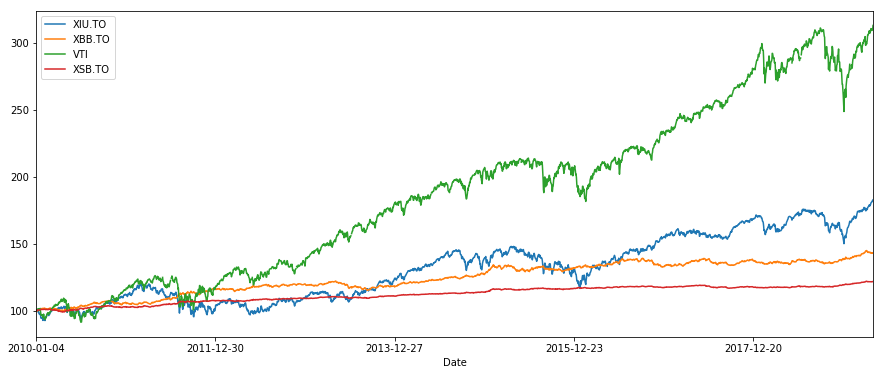

In [12]:
# We have to exclude the trade_year column as this is a string.
df_no_date = new_data.iloc[:,0:4]

# Now we normalize the data
(df_no_date.iloc[:,0:4] / df_no_date.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

*We can see that with the normalized price XIU does a little better, as does XBB*

### Volatility

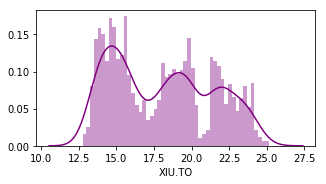

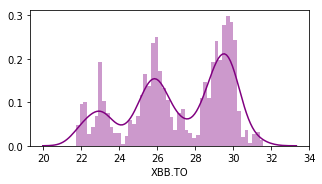

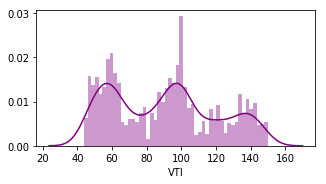

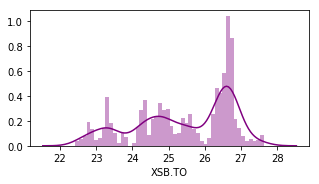

In [13]:
for t in tickers:
    plt.figure(figsize=(5,2.5))
    sns.distplot(new_data[t].dropna(), bins=50, color='purple')


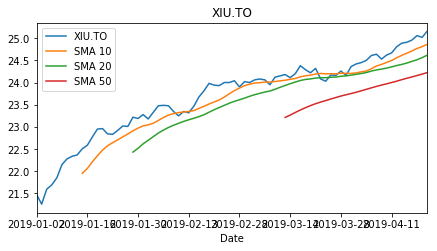

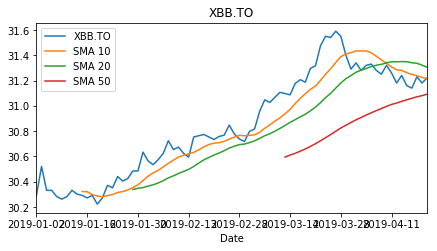

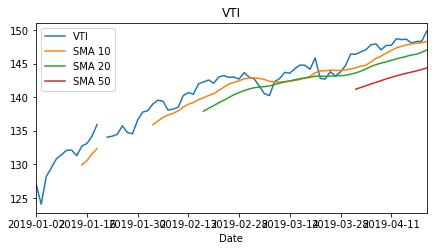

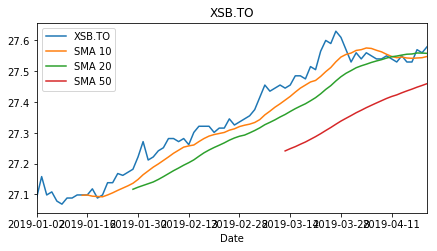

In [14]:
# Get the most recent year for this
latest_year_df = new_data[new_data.trade_year == new_data.trade_year.max()]

for t in tickers:
    # Use the most recent year for this
    # simple moving averages
    sma10 = latest_year_df[t].rolling(10).mean() #10 days
    sma20 = latest_year_df[t].rolling(20).mean() #20 days
    sma50 = latest_year_df[t].rolling(50).mean() #50 days
 
    CMTsma = pd.DataFrame({t: latest_year_df[t], 'SMA 10': sma10, 'SMA 20': \
                           sma20, 'SMA 50': sma50})
    CMTsma.plot(figsize=(7, 3.5), legend=True, title=t)
 
# add vertical lines with annotations
#plt.axvline(x = '2015-11-3', color = "black", lw=0.5)
#plt.text('2015-10-23', 2.25, 'SMA 10-20',rotation=90)
#plt.axvline(x = '2015-11-20', color = "black", lw=0.5)
#plt.text('2015-11-24', 2.25, 'SMA 10-50',rotation=90)

### Boxplots to show variance

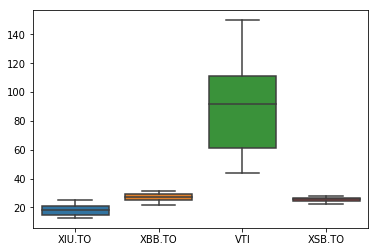

In [15]:
sns.boxplot(data=new_data[tickers])

### Correlations

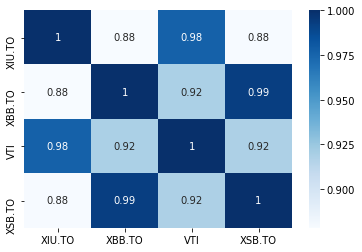

In [16]:
# Calculate correlations
corr = new_data[tickers].corr()

# Heatmap

sns.heatmap(corr, cmap = "Blues", annot=True)

*The lowest correlation is 0.92 for VTI to XBB. It's surprising that these two stocks
are so highly correlated*

### Average Daily Return

#### Simple Return

$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

First we calculate the daily simple returns, then we get the average, and we multiply this number buy the number of trading days in the year.

In [17]:
# Let's add these new results to a DataFrame

avg_simp_yr_returns = []


for t in tickers:
    a = (new_data[[t]]/new_data[[t]].shift(1)-1).mean()*250
    avg_simp_yr_returns.append([t,a[0]])
    
df_avg_simp = pd.DataFrame(avg_simp_yr_returns)


df_avg_simp.columns = ['ticker','simp_yr_return']
# Sort the DataFrame
df_avg_simp.sort_values(by=['simp_yr_return'], ascending=False, inplace=True)
# Format the value of the yr_return column
df_avg_simp['simp_yr_return'] = round(df_avg_simp.simp_yr_return,4) * 100

But really we don't need to loop. There's a simpler way.

In [23]:
# However this might be slightly less accurate

returns = (new_data.iloc[:,0:4] / new_data.iloc[:,0:4].shift(1)) - 1
annual_returns = returns.mean() * 250
df_ann_returns = pd.DataFrame(annual_returns)
df_ann_returns.columns = ['simp_yr_return']
df_ann_returns['simp_yr_return'] = round(df_ann_returns.simp_yr_return,4) * 100

In [24]:
df_ann_returns

,simp_yr_return
XIU.TO,7.26
XBB.TO,3.94
VTI,13.60
XSB.TO,2.15


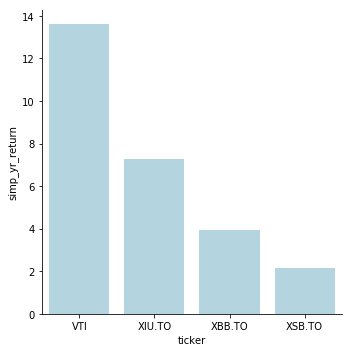

In [25]:
# Plot this

sns.catplot(x='ticker', y='simp_yr_return', color='lightblue', data=df_avg_simp, kind='bar', legend=False)

#### Logarithmic Return

In [26]:
# Let's add these new results to a DataFrame

avg_log_yr_returns = []

#np.log(MSFT['Adj Close'] / MSFT['Adj Close'].shift(1))
for t in tickers:
    a = np.log(new_data[[t]] / new_data[[t]].shift(1)).mean()*250
    avg_log_yr_returns.append([t,a[0]])
    
df_avg_log = pd.DataFrame(avg_log_yr_returns)


df_avg_log.columns = ['ticker','log_yr_return']
# Sort the DataFrame
df_avg_log.sort_values(by=['log_yr_return'], ascending=False, inplace=True)
# Format the value of the yr_return column
df_avg_log['log_yr_return'] = round(df_avg_log.log_yr_return,4) * 100

In [27]:
df_avg_log

,ticker,log_yr_return
2,VTI,12.42
0,XIU.TO,6.47
1,XBB.TO,3.86
3,XSB.TO,2.13


### Portfolio Analysis

We will use the portfolio of 3 stocks, XIU, VTI, and XBB. 
They are weighted 30-30-40 respectively.

In [28]:
# Subset of data for just these stocks
port_stocks = new_data.iloc[:,0:3]

Simple returns are the preferred approach to analyse a few stocks over a time period.

Let's recall the three stocks annual returns

In [29]:
df_avg_simp.iloc[0:3,]

,ticker,simp_yr_return
2,VTI,13.60
0,XIU.TO,7.26
1,XBB.TO,3.94


Now we define the weights of those stocks.

In [30]:
weights = np.array([0.30, 0.30, 0.40])

In [31]:
df_avg_simp.iloc[0:3,1:2]
# Convert to an array
df1 = df_avg_simp.iloc[0:3,1:2].values[0:3,0]
# Multiply array to get overall return
portfolio_1 = str(round(np.dot(df1, weights),2)) + ' %'

In [32]:
portfolio_1

'7.83 %'

*The average return of this portfolio is about 7.8%*

In [33]:
+13.50 * .3 + 7.2 * .3 + 3.94 * .4

7.786

### Risk

In [140]:
vols = returns[tickers].std() * 250 ** 0.5

In [141]:
vols = pd.DataFrame(vols)

In [142]:
vols.columns = ['Variance']

In [143]:
vols.sort_values(by=['Variance'], ascending=False, inplace=True)

In [144]:
vols['Variance'] = round(vols['Variance'] * 100,2)

In [145]:
vols

,Variance
VTI,15.33
XIU.TO,12.57
XBB.TO,3.97
XSB.TO,1.83


In [146]:
rets = pd.DataFrame(returns.mean() * 250 * 100)
rets.columns = ['Avg. Return']


In [150]:
rets.sort_values(by=['Avg. Return'], ascending=False, inplace=True)

In [151]:
rets

,Avg. Return
VTI,13.604698
XIU.TO,7.256419
XBB.TO,3.939609
XSB.TO,2.150182
